In [1]:

######## snakemake preamble start (automatically inserted, do not edit) ########
library(methods)
Snakemake <- setClass(
    "Snakemake",
    slots = c(
        input = "list",
        output = "list",
        params = "list",
        wildcards = "list",
        threads = "numeric",
        log = "list",
        resources = "list",
        config = "list",
        rule = "character",
        bench_iteration = "numeric",
        scriptdir = "character",
        source = "function"
    )
)
snakemake <- Snakemake(
    input = list(),
    output = list(),
    params = list(),
    wildcards = list(),
    threads = 1,
    log = list( 'rds' = 'out/ipynb/compute_unsupervised_classification/pca.rds'),
    resources = list('tmpdir', "tmpdir" = '/tmp'),
    config = list(),
    rule = 'ipynb',
    bench_iteration = as.numeric(NA),
    scriptdir = '/mnt/thymus/synoSalva/illumina_sequencing_data/mw/mw-oncodiag/src/snakemake/rules/../../ipynb',
    source = function(...){
        wd <- getwd()
        setwd(snakemake@scriptdir)
        source(...)
        setwd(wd)
    }
)
# setwd('/mnt/thymus/synoSalva/illumina_sequencing_data/mw/mw-oncodiag');
setwd('/srv/shiny-server/mw-oncodiag');

######## snakemake preamble end #########
# context <- "CpG"
context <- "CHH"
# context <- "CHG"

In [2]:
# start coding here

In [3]:
IRdisplay::display_markdown(
    sprintf(
"_Compute unsupervised classification %s_

__Oncodiag project__

[Guillaume Charbonnier](mailto:gc.bioinfo@gmail.com)

%s",
        snakemake@wildcards$design,
        format(Sys.Date(), "%Y-%m-%d")
    )
)

# Abstract

The aim of this analysis is to assess the main components of variance in the dataset.

# Methods

## Load depencies

### Packages

In [4]:
if (!require("BiocManager", quietly = TRUE)) {
    install.packages(
        "BiocManager",
        quiet = TRUE
    )
}
packages <- c(
  "data.table",
  # "dplyr",
  "openxlsx",
  # "methylSig",
  "DSS",
  "bsseq",
  "ChIPpeakAnno",
  "irlba",
  # "ChIPseeker",
  # "methyAnalysis",
  "org.Hs.eg.db",
  "TxDb.Hsapiens.UCSC.hg19.knownGene",
  # "EnhancedVolcano",
  # "data.table",
  "ggpubr",
  # "ComplexHeatmap",
  "tidyr"
)
BiocManager::install(
    packages,
    update = FALSE,
    quiet = TRUE,
    Ncpus = parallel::detectCores()
)
invisible(
    lapply(
      packages,
      library,
      character.only = TRUE
    )
)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org



Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'data.table' 'openxlsx' 'DSS' 'bsseq'
  'ChIPpeakAnno' 'irlba' 'org.Hs.eg.db' 'TxDb.Hsapiens.UCSC.hg19.knownGene'
  'ggpubr' 'tidyr'”
Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to B

In [5]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Pop!_OS 22.04 LTS

Matrix products: default
BLAS/LAPACK: /home/gcharbonnier/mambaforge/envs/rkernel_diff_meth_v2/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_DK.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_DK.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_DK.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_DK.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Paris
tzcode source: system (glibc)

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] tidyr_1.3.0                            
 [2] ggpubr_0.6.0                           
 [3] ggplot2_3.4.4                          
 [4] TxDb.Hsapiens.UCSC.hg19.knownGene_3.2.2
 [

In [6]:
set_plot_dim <- function(
    width = 16,
    height = 9
) {
    options(
        #jupyter.plot_scale=1,
        repr.plot.width = width,
        repr.plot.height = height
    )
}
set_plot_dim(5,5)

In [7]:
getwd()

[1] "/mnt/Data_2/mw-oncodiag"

### Data

In [8]:
samples

new("standardGeneric", .Data = function (object) 
standardGeneric("samples"), generic = "samples", package = "Biobase", 
    group = list(), valueClass = character(0), signature = "object", 
    default = NULL, skeleton = (function (object) 
    stop(gettextf("invalid call in method dispatch to '%s' (no default method)", 
        "samples"), domain = NA))(object))
<bytecode: 0x562d469d2db0>
<environment: 0x562d469cb948>
attr(,"generic")
[1] "samples"
attr(,"generic")attr(,"package")
[1] "Biobase"
attr(,"package")
[1] "Biobase"
attr(,"group")
list()
attr(,"valueClass")
character(0)
attr(,"signature")
[1] "object"
attr(,"default")
`\001NULL\001`
attr(,"skeleton")
(function (object) 
stop(gettextf("invalid call in method dispatch to '%s' (no default method)", 
    "samples"), domain = NA))(object)
attr(,"class")
[1] "standardGeneric"
attr(,"class")attr(,"package")
[1] "methods"

In [9]:
sample_metadata <- read.csv(
  "src/sample_sheets/all.csv"
)
# Here I temporarily subset the sample sheets to already available samples
suffix <- paste0(".markdup.sorted_", context, ".bedGraph")
# input_dir <- "out/nextflow/nfcore_methylseq/methyldackel/"
input_dir <- "out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/"

files <- list.files(
    path = input_dir,
    pattern = suffix
)
samples <- sub(
    suffix,
    "",
    files
)
sample_metadata <- sample_metadata[sample_metadata$sample %in% samples,]
# Remove patient 9 and 10 because they have low coverae
sample_metadata <- sample_metadata[!sample_metadata$patient_number %in% c(9,10),]
sample_metadata

,sample,fastq_1,fastq_2,patient_number,tissue
,<chr>,<chr>,<chr>,<int>,<chr>
1,ODG_080,inp/ONCODIAG/Novaseq_131222/fastq/ODG_080_S1_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_080_S1_R2_001.fastq.gz,1,normal
2,ODG_081,inp/ONCODIAG/Novaseq_131222/fastq/ODG_081_S2_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_081_S2_R2_001.fastq.gz,1,tumoral
3,ODG_082,inp/ONCODIAG/Novaseq_131222/fastq/ODG_082_S3_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_082_S3_R2_001.fastq.gz,2,normal
4,ODG_083,inp/ONCODIAG/Novaseq_131222/fastq/ODG_083_S4_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_083_S4_R2_001.fastq.gz,2,tumoral
5,ODG_084,inp/ONCODIAG/Novaseq_131222/fastq/ODG_084_S5_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_084_S5_R2_001.fastq.gz,3,normal
6,ODG_085,inp/ONCODIAG/Novaseq_131222/fastq/ODG_085_S6_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_085_S6_R2_001.fastq.gz,3,tumoral
7,ODG_086,inp/ONCODIAG/Novaseq_131222/fastq/ODG_086_S7_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_086_S7_R2_001.fastq.gz,4,normal
8,ODG_087,inp/ONCODIAG/Novaseq_131222/fastq/ODG_087_S8_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_087_S8_R2_001.fastq.gz,4,tumoral
9,ODG_088,inp/ONCODIAG/Novaseq_131222/fastq/ODG_088_S9_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_088_S9_R2_001.fastq.gz,5,normal


In [10]:
# This will be used to load files with read.bismarck()
sample_metadata$bedGraph <- paste0(
    # 'out/nextflow/nfcore_methylseq/methyldackel/',
    # After 2023-11-06, I reprocessed methyldackel outside the nextflow pipeline
    # to have the possibility to generate CHH and CHG bedGraph files.
    'out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/',
    sample_metadata$sample,
    '.markdup.sorted_',
    context,
    '.bedGraph'
)

In [11]:
# row.names should be declared to be used as row.names of the BSseq object
# because DMLtest() uses these row.namesto select samples
row.names(sample_metadata) <- sample_metadata$sample
sample_metadata

,sample,fastq_1,fastq_2,patient_number,tissue,bedGraph
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
ODG_080,ODG_080,inp/ONCODIAG/Novaseq_131222/fastq/ODG_080_S1_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_080_S1_R2_001.fastq.gz,1,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_080.markdup.sorted_CHH.bedGraph
ODG_081,ODG_081,inp/ONCODIAG/Novaseq_131222/fastq/ODG_081_S2_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_081_S2_R2_001.fastq.gz,1,tumoral,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_081.markdup.sorted_CHH.bedGraph
ODG_082,ODG_082,inp/ONCODIAG/Novaseq_131222/fastq/ODG_082_S3_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_082_S3_R2_001.fastq.gz,2,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_082.markdup.sorted_CHH.bedGraph
ODG_083,ODG_083,inp/ONCODIAG/Novaseq_131222/fastq/ODG_083_S4_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_083_S4_R2_001.fastq.gz,2,tumoral,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_083.markdup.sorted_CHH.bedGraph
ODG_084,ODG_084,inp/ONCODIAG/Novaseq_131222/fastq/ODG_084_S5_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_084_S5_R2_001.fastq.gz,3,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_084.markdup.sorted_CHH.bedGraph
ODG_085,ODG_085,inp/ONCODIAG/Novaseq_131222/fastq/ODG_085_S6_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_085_S6_R2_001.fastq.gz,3,tumoral,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_085.markdup.sorted_CHH.bedGraph
ODG_086,ODG_086,inp/ONCODIAG/Novaseq_131222/fastq/ODG_086_S7_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_086_S7_R2_001.fastq.gz,4,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_086.markdup.sorted_CHH.bedGraph
ODG_087,ODG_087,inp/ONCODIAG/Novaseq_131222/fastq/ODG_087_S8_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_087_S8_R2_001.fastq.gz,4,tumoral,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_087.markdup.sorted_CHH.bedGraph
ODG_088,ODG_088,inp/ONCODIAG/Novaseq_131222/fastq/ODG_088_S9_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_088_S9_R2_001.fastq.gz,5,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_088.markdup.sorted_CHH.bedGraph


In [12]:
 snakemake@log$rds

[1] "out/ipynb/compute_unsupervised_classification/pca.rds"

In [13]:
getwd()

[1] "/mnt/Data_2/mw-oncodiag"

In [14]:
context

[1] "CHH"

In [15]:
# loci <- findLoci(
#     pattern = sub("p","", context),
#     subject = "out/gunzip/to-stdout/wget/ftp/ftp.ensembl.org/pub/grch37/current/fasta/homo_sapiens/dna/Homo_sapiens.GRCh37.dna.toplevel.fasta",
#     # subject = BSgenome.Hsapiens.UCSC.hg19,
#     # include = seqlevels(subject),
#     # strand = c("*", "+", "-"),
#     strand = "*",
#     # fixed = "subject",
#     resize = TRUE
# )
# seqlevels(loci) <- sub(" dna.*$", "", seqlevels(loci))
# loci[seqnames(loci) == 1,]

# loci

In [16]:
# loci_minus <- findLoci(
#     pattern = sub("p","", context),
#     subject = "out/gunzip/to-stdout/wget/ftp/ftp.ensembl.org/pub/grch37/current/fasta/homo_sapiens/dna/Homo_sapiens.GRCh37.dna.toplevel.fasta",
#     # subject = BSgenome.Hsapiens.UCSC.hg19,
#     # include = seqlevels(subject),
#     # strand = c("*", "+", "-"),
#     strand = "-",
#     # fixed = "subject",
#     resize = TRUE
# )
# seqlevels(loci_minus) <- sub(" dna.*$", "", seqlevels(loci_minus))
# loci_minus[seqnames(loci_minus) == 1,]

# loci

In [17]:
# loci_plus <- findLoci(
#     pattern = sub("p","", context),
#     subject = "out/gunzip/to-stdout/wget/ftp/ftp.ensembl.org/pub/grch37/current/fasta/homo_sapiens/dna/Homo_sapiens.GRCh37.dna.toplevel.fasta",
#     # subject = BSgenome.Hsapiens.UCSC.hg19,
#     # include = seqlevels(subject),
#     # strand = c("*", "+", "-"),
#     strand = "+",
#     # fixed = "subject",
#     resize = TRUE
# )
# seqlevels(loci_plus) <- sub(" dna.*$", "", seqlevels(loci_plus))
# loci_plus[seqnames(loci_plus) == 1,]

# # loci

In [18]:
sample_metadata

,sample,fastq_1,fastq_2,patient_number,tissue,bedGraph
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
ODG_080,ODG_080,inp/ONCODIAG/Novaseq_131222/fastq/ODG_080_S1_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_080_S1_R2_001.fastq.gz,1,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_080.markdup.sorted_CHH.bedGraph
ODG_081,ODG_081,inp/ONCODIAG/Novaseq_131222/fastq/ODG_081_S2_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_081_S2_R2_001.fastq.gz,1,tumoral,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_081.markdup.sorted_CHH.bedGraph
ODG_082,ODG_082,inp/ONCODIAG/Novaseq_131222/fastq/ODG_082_S3_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_082_S3_R2_001.fastq.gz,2,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_082.markdup.sorted_CHH.bedGraph
ODG_083,ODG_083,inp/ONCODIAG/Novaseq_131222/fastq/ODG_083_S4_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_083_S4_R2_001.fastq.gz,2,tumoral,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_083.markdup.sorted_CHH.bedGraph
ODG_084,ODG_084,inp/ONCODIAG/Novaseq_131222/fastq/ODG_084_S5_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_084_S5_R2_001.fastq.gz,3,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_084.markdup.sorted_CHH.bedGraph
ODG_085,ODG_085,inp/ONCODIAG/Novaseq_131222/fastq/ODG_085_S6_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_085_S6_R2_001.fastq.gz,3,tumoral,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_085.markdup.sorted_CHH.bedGraph
ODG_086,ODG_086,inp/ONCODIAG/Novaseq_131222/fastq/ODG_086_S7_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_086_S7_R2_001.fastq.gz,4,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_086.markdup.sorted_CHH.bedGraph
ODG_087,ODG_087,inp/ONCODIAG/Novaseq_131222/fastq/ODG_087_S8_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_087_S8_R2_001.fastq.gz,4,tumoral,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_087.markdup.sorted_CHH.bedGraph
ODG_088,ODG_088,inp/ONCODIAG/Novaseq_131222/fastq/ODG_088_S9_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_088_S9_R2_001.fastq.gz,5,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_088.markdup.sorted_CHH.bedGraph


In [19]:
outdir <- "out/ipynb/compute_simple_stats"
outfile <- file.path(
    outdir,
    paste0(
        context,
        ".rds"
    )
)

if (file.exists(outfile)) {
    sample_metadata <-readRDS(outfile)
} else {
    # We create an output sample_metadata that will hold the results
    sample_metadata$mean_methylation <- NA

    dir.create(outdir)
    saveRDS(
        sample_metadata,
        file = outfile
    )
}

In [21]:
sample_metadata$mean_methylation

[1] 0.6852227 0.7653693 0.6550392 0.7746706 0.8396094 0.8502482 0.7902193
 [8] 2.9405912 0.6967939 0.7560837 0.7568600 0.7560728 0.7802217 0.7905578
[15] 0.7048223        NA        NA        NA        NA        NA        NA
[22]        NA        NA        NA        NA        NA

In [22]:
for (row in 1:nrow(sample_metadata)) {
    message("Loading sample ", row, "/", nrow(sample_metadata))
    if (is.na(sample_metadata[row,]$mean_methylation)) {
        d <- fread(
            sample_metadata[row,]$bedGraph,
            select = 4,
            skip = 1,
            sep = "\t"
        )
        sample_metadata[row,]$mean_methylation <- mean(d$V4)
        rm(d)
        saveRDS(
            sample_metadata,
            file = outfile
        )
    }

}
sample_metadata

Loading sample 1/26

Loading sample 2/26

Loading sample 3/26

Loading sample 4/26

Loading sample 5/26

Loading sample 6/26

Loading sample 7/26

Loading sample 8/26

Loading sample 9/26

Loading sample 10/26

Loading sample 11/26

Loading sample 12/26

Loading sample 13/26

Loading sample 14/26

Loading sample 15/26

Loading sample 16/26



Loading sample 17/26

Loading sample 18/26

Loading sample 19/26

Loading sample 20/26

Loading sample 21/26

Loading sample 22/26

Loading sample 23/26

Loading sample 24/26

Loading sample 25/26

Loading sample 26/26



,sample,fastq_1,fastq_2,patient_number,tissue,bedGraph,mean_methylation
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
ODG_080,ODG_080,inp/ONCODIAG/Novaseq_131222/fastq/ODG_080_S1_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_080_S1_R2_001.fastq.gz,1,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_080.markdup.sorted_CHH.bedGraph,0.6852227
ODG_081,ODG_081,inp/ONCODIAG/Novaseq_131222/fastq/ODG_081_S2_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_081_S2_R2_001.fastq.gz,1,tumoral,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_081.markdup.sorted_CHH.bedGraph,0.7653693
ODG_082,ODG_082,inp/ONCODIAG/Novaseq_131222/fastq/ODG_082_S3_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_082_S3_R2_001.fastq.gz,2,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_082.markdup.sorted_CHH.bedGraph,0.6550392
ODG_083,ODG_083,inp/ONCODIAG/Novaseq_131222/fastq/ODG_083_S4_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_083_S4_R2_001.fastq.gz,2,tumoral,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_083.markdup.sorted_CHH.bedGraph,0.7746706
ODG_084,ODG_084,inp/ONCODIAG/Novaseq_131222/fastq/ODG_084_S5_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_084_S5_R2_001.fastq.gz,3,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_084.markdup.sorted_CHH.bedGraph,0.8396094
ODG_085,ODG_085,inp/ONCODIAG/Novaseq_131222/fastq/ODG_085_S6_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_085_S6_R2_001.fastq.gz,3,tumoral,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_085.markdup.sorted_CHH.bedGraph,0.8502482
ODG_086,ODG_086,inp/ONCODIAG/Novaseq_131222/fastq/ODG_086_S7_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_086_S7_R2_001.fastq.gz,4,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_086.markdup.sorted_CHH.bedGraph,0.7902193
ODG_087,ODG_087,inp/ONCODIAG/Novaseq_131222/fastq/ODG_087_S8_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_087_S8_R2_001.fastq.gz,4,tumoral,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_087.markdup.sorted_CHH.bedGraph,2.9405912
ODG_088,ODG_088,inp/ONCODIAG/Novaseq_131222/fastq/ODG_088_S9_R1_001.fastq.gz,inp/ONCODIAG/Novaseq_131222/fastq/ODG_088_S9_R2_001.fastq.gz,5,normal,out/methyldackel/extract_fa-genome-hg19/samtools/index/nextflow/nfcore_methylseq/bwameth/deduplicated/ODG_088.markdup.sorted_CHH.bedGraph,0.6967939


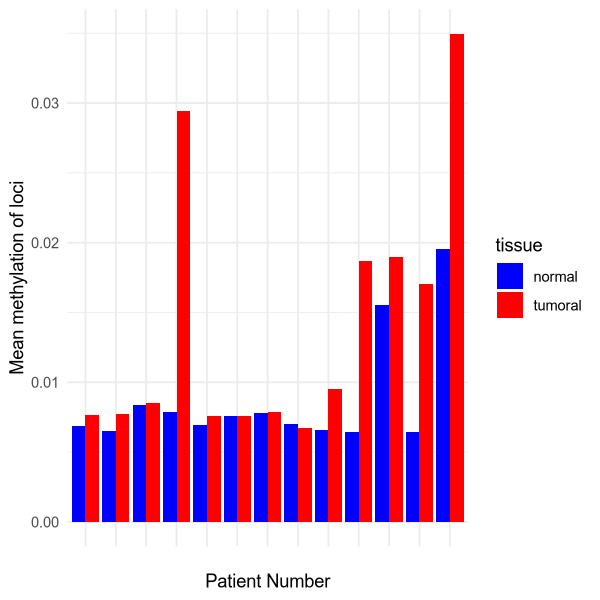

In [30]:
df <- sample_metadata
df$mean_methylation <- df$mean_methylation / 100
df$patient_number <- factor(df$patient_number)
p <- ggplot(df, aes(x = patient_number, y = mean_methylation, fill = tissue)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Patient Number") +
  ylab("Mean methylation of loci") +
  scale_x_discrete(labels = function(x) vector("character", length(x))) + # Hide x-axis labels
#   ggtitle("Proportions of Methylation Values\nBelow 0.2 and Above 0.8") +
  theme_minimal() +
  scale_fill_manual(values = c("normal" = "blue", "tumoral" = "red"))

ggsave(
  p,
  file = file.path(
    outdir,
    paste0(
        "mean_methylation_",
        context,
        ".pdf"
    )
  ),
  width = 5,
  height = 5
)
p

In [ ]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Pop!_OS 22.04 LTS

Matrix products: default
BLAS/LAPACK: /home/gcharbonnier/mambaforge/envs/rkernel_diff_meth_v2/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_DK.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_DK.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_DK.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_DK.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Paris
tzcode source: system (glibc)

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] reshape2_1.4.4                         
 [2] HDF5Array_1.28.1                       
 [3] rhdf5_2.44.0                           
 [4] DelayedArray_0.26.6                    
 [